In [2]:
from shapely.geometry import Point
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import geopandas as gpd

loading may data - pickle and csv


In [3]:
%%time
may_loc = pd.read_pickle("../data/may.pkl")
may_trip = pd.read_csv("../data/may_trip.csv")

Wall time: 6.7 s


This section makes a dictionary of dataframes. The dataframes can be "chunked up" into different time segments. The main things you need to adjust: the start and end variables, and the delta variable, which designates how "big" a "time chunk" should be.

In [4]:
#make a list of datetimes with datetime function 
start = datetime(2019, 5, 1, 0, 0)
end = datetime(2019, 5, 1, 1, 0)
delta = timedelta(hours=1)
timelist = []
timenamelist = []
while start <= end:
    timelist.append(start)
    timenamelist.append(start.strftime("%Y-%m-%d-%H-%M"))
    start += delta
# print(timelist)
# print(timenamelist)

In [5]:
#goal of function: using list of time frames, in this case, days, make a dataframe containing
#info about the location for each scooter, for each day


#make dictionary of dataframes using base dataframe and a user-defined segments_of_time_list
#from cell above
def make_day_df(datetime_list, timenames_list, dataframe, colname):
    resultslist = {} #turn into dictionary
    x = 0
    y = 1
    z = 0
    while x in range(0,len(datetime_list)-1):
        starttime = datetime_list[x]
        endtime = datetime_list[y]
        mask = (dataframe[colname] > starttime) & (dataframe[colname] <= endtime)
        framename = dataframe.loc[mask]
        x += 1
        y += 1
        print(x)
        resultslist[timenames_list[z]] = framename
        z += 1
    return resultslist
        
the_output = make_day_df(timelist, timenamelist, may_loc,"pubdatetime")


1


In [6]:
the_output.keys()

dict_keys(['2019-05-01-00-00'])

In [7]:
the_output['2019-05-01-00-00']
# the_output['2019-05-01-00-00']['sumdid'].nunique()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0
...,...,...,...,...,...,...
26124,2019-05-01 00:59:59.163,36.121562,-86.774363,PoweredKJTKOKALXNPZX,81.0,3
26125,2019-05-01 00:59:59.163,36.122702,-86.775087,PoweredCVH7LMHIIIIAF,77.0,3
26126,2019-05-01 00:59:59.163,36.124224,-86.773634,Powered5SZPJJWT56FG3,81.0,3
26127,2019-05-01 00:59:59.163,36.127435,-86.776972,PoweredIKAA5T3PT44MA,42.0,3


This section below is experimental geospatial stuff, adapted from our geospatial notebook for the most part. IF you want to mess with this bit, make sure you load the notebook in the geospatial enivronment.

In [10]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
# promise_zones= promise_zones.to_crs('EPSG:4326')
print(promise_zones)

epsg:2274
   OBJECTID  ZONE_ID    SHAPE_STAr     SHAPE_STLe  \
0         1        1  1.053728e+08   49364.601403   
1         2        2  7.670585e+07   45226.018917   
2         3        3  2.985488e+08   75207.067487   
3         4        4  2.713638e+08   74348.596054   
4         5        5  3.928178e+08  106661.712102   
5         6        6  9.535996e+07   59256.923574   

                                            geometry  
0  POLYGON ((1743366.812 678044.543, 1743367.698 ...  
1  POLYGON ((1738690.545 661791.347, 1738733.644 ...  
2  POLYGON ((1759602.544 668309.889, 1759640.155 ...  
3  POLYGON ((1747799.003 654974.612, 1747821.293 ...  
4  POLYGON ((1737013.744 692634.639, 1737122.605 ...  
5  POLYGON ((1716935.654 667534.495, 1716992.481 ...  


<AxesSubplot:>

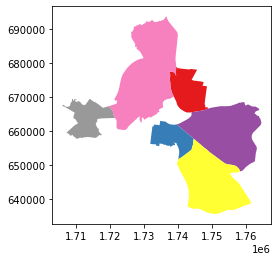

In [11]:
promise_zones.plot(cmap='Set1')

In [47]:
# zipcodes = gpd.read_file('../../da5-geospatial-python-workshop-derektprice/data/zipcodes.geojson')
# print(zipcodes.crs)
# zipcodes.head( )

In [12]:
#adding geomtery column with lambda and point
the_output['2019-05-01-00-00']['geometry'] = the_output['2019-05-01-00-00'].apply(lambda x: Point(x['longitude'], 
                                                         x['latitude']), axis=1)
the_output['2019-05-01-00-00'].head(3)

C:\Users\Derek\AppData\Local\Temp/ipykernel_14176/1316813279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_output['2019-05-01-00-00']['geometry'] = the_output['2019-05-01-00-00'].apply(lambda x: Point(x['longitude'],


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.799877 36.136822)
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,POINT (-86.77294500000001 36.191252)
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,POINT (-86.806293 36.144752)


In [13]:
#made a geodf
one_hour_geodf = gpd.GeoDataFrame(the_output['2019-05-01-00-00'],
                           crs = promise_zones.crs,
                           geometry = the_output['2019-05-01-00-00']['geometry'])
one_hour_geodf.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.79988 36.13682)
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,POINT (-86.77295 36.19125)
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,POINT (-86.80629 36.14475)
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,POINT (-86.77469 36.16206)
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,POINT (-86.78311 36.15097)


In [14]:
#spatial join
may_1_1AM_geodf = gpd.sjoin(one_hour_geodf, promise_zones, op="within")
may_1_1AM_geodf.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe


In [15]:
#number of 
may_1_1AM_geodf['ZONE_ID'].value_counts()

Series([], Name: ZONE_ID, dtype: int64)